<a href="https://colab.research.google.com/github/naomori/codexa_DecisionTree_RandomForest/blob/master/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section.1: データセットについて

https://www.kaggle.com/harlfoxem/housesalesprediction/data

In [2]:
from google.colab import files
#uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


# Section.2: 評価方法

分類では、混同行列（Confusion Matrix）と正解率（Accuracy）をモデルの評価指標として使いました。
回帰では、RMSE（Root Mean Square Error）を使います。

# Section.3: ライブラリとデータの読み込み

In [0]:
# データ処理のライブラリ
import pandas as pd
import numpy as np 

# データ可視化のライブラリ
import matplotlib.pyplot as plt
import seaborn as sns 

# 機械学習ライブラリ
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 決定木の可視化ライブラリ
from sklearn import tree
import graphviz

# その他表示等の設定
pd.set_option('max_columns', 35)
pd.set_option('max_rows', 600)
sns.set_style("darkgrid")

In [0]:
# CSVファイルの読み込み
kchouse = pd.read_csv('kc_house_data.csv')

# Section.4: EDA(Explanatory Data Analysis: 探索的データ解析)とデータ前処理

新しいデータを扱う際には、EDAを行うことで、データセットの知っておくべき前提や特徴、
さらに可視化をすることで、より深い理解を得る必要があります。

In [7]:
# データセットの最初の5行を表示
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# データセットの基本統計量を表示
kchouse.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
# 不要なカラムをデータセットから削除
kchouse = kchouse.drop(['id','date'], axis=1)

### 寝室の数（特徴量名：bedrooms）



In [10]:
# 寝室の数（bedrooms）を基軸にグルーピング
kchouse_m_bedrooms = kchouse.groupby('bedrooms', as_index=True).median()
kchouse_m_bedrooms.head()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,
0,288000.0,0.0,1470.0,5900.0,2.0,0.0,0.0,3.0,7.0,1470.0,0.0,1990.0,0.0,98065.0,47.52610,-122.168,1810.0,7200.0
1,299000.0,1.0,780.0,5750.0,1.0,0.0,0.0,3.0,6.0,760.0,0.0,1940.0,0.0,98116.0,47.56210,-122.315,1360.0,5650.0
2,374000.0,1.0,1140.0,5244.0,1.0,0.0,0.0,3.0,7.0,1010.0,0.0,1948.0,0.0,98116.0,47.60285,-122.316,1430.0,5400.0
3,413000.0,2.0,1680.0,7629.5,1.0,0.0,0.0,3.0,7.0,1440.0,0.0,1976.0,0.0,98059.0,47.56505,-122.231,1720.0,7688.5
4,549997.5,2.5,2410.0,8100.0,2.0,0.0,0.0,3.0,8.0,2080.0,0.0,1980.0,0.0,98056.0,47.57110,-122.192,2190.0,8000.0


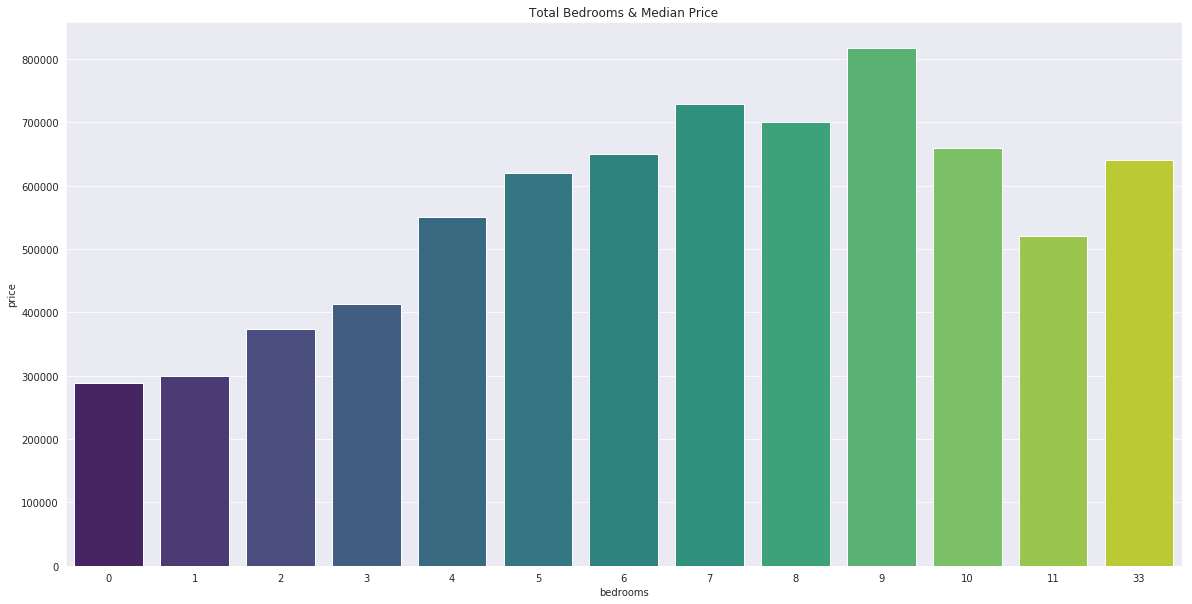

In [11]:
# 寝室の数と価格のグラフ
plt.figure(figsize=(20,10))
plt.title('Total Bedrooms & Median Price')
sns.barplot(x=kchouse_m_bedrooms.index,y='price', data=kchouse_m_bedrooms, palette = 'viridis')

### トイレの数（bathrooms）

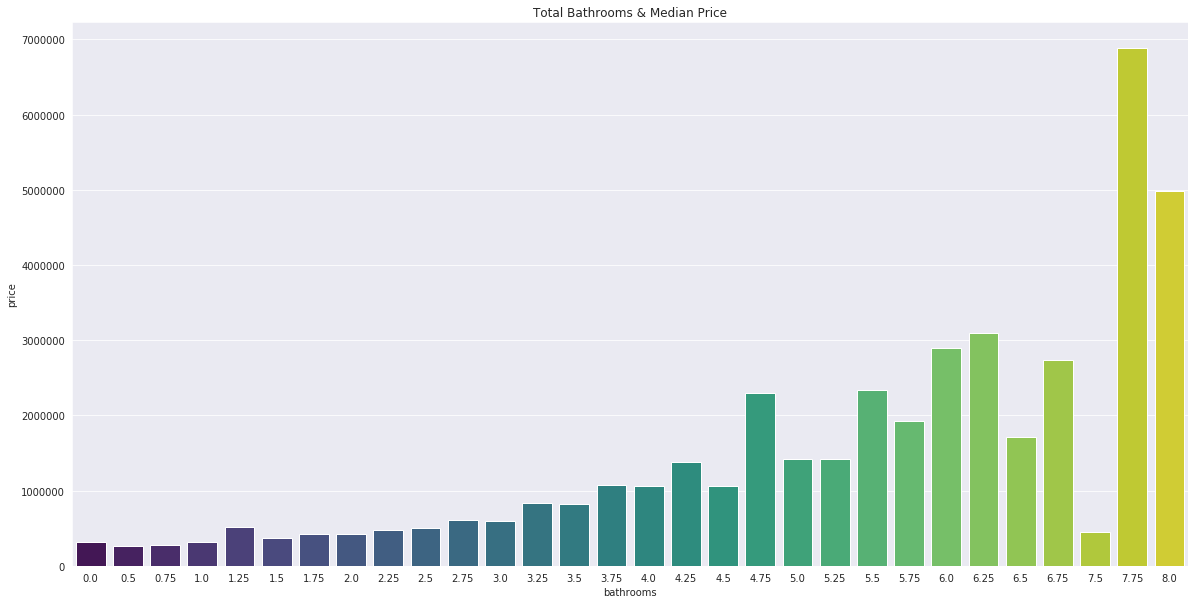

In [12]:
# トイレの数（bathrooms)を基軸に中央値でグルーピング
kchouse_m_bathrooms= kchouse.groupby('bathrooms', as_index=True).median()

# トイレの数と価格の中央値のグラフ
plt.figure(figsize=(20,10))
plt.title('Total Bathrooms & Median Price')
sns.barplot(x=kchouse_m_bathrooms.index,y='price', data=kchouse_m_bathrooms, palette = 'viridis')

In [13]:
# トイレの数（bathrooms）が7以上
kchouse[kchouse['bathrooms'] > 6]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4024,800000.0,7,6.75,7480,41664,2.0,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8546,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
14556,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,3300000.0,5,6.25,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
20578,1180000.0,6,6.50,6260,10955,2.0,0,0,3,11,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550
21506,2238890.0,5,6.50,7270,130017,2.0,0,0,3,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890


### 物件面積（sqft_living）

Text(0.5, 1.0, 'SQFT of House & Median Price')

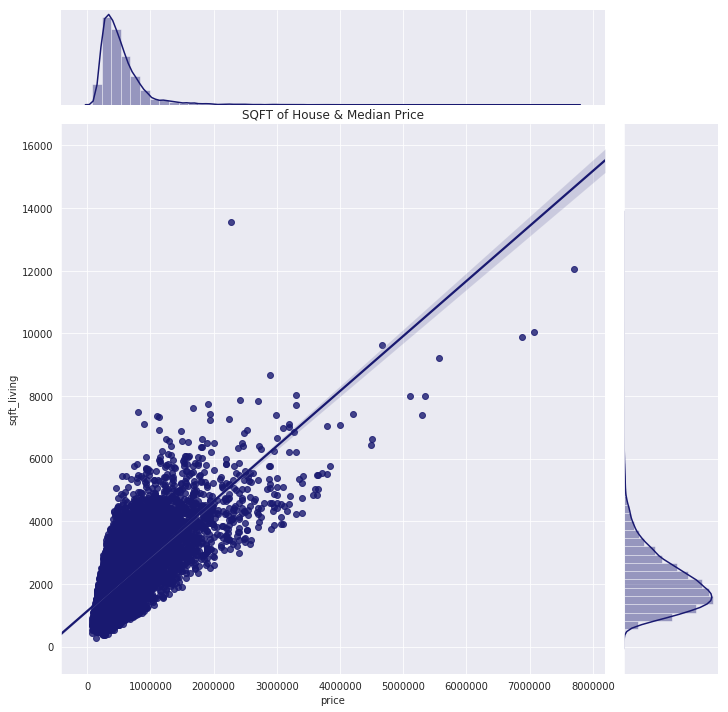

In [15]:
# 価格と物件面積の散布図
sns.jointplot(x='price',y='sqft_living', data = kchouse, kind = 'reg', height = 10,  color = 'midnightblue')
plt.title('SQFT of House & Median Price')

### 物件の回数（floors）

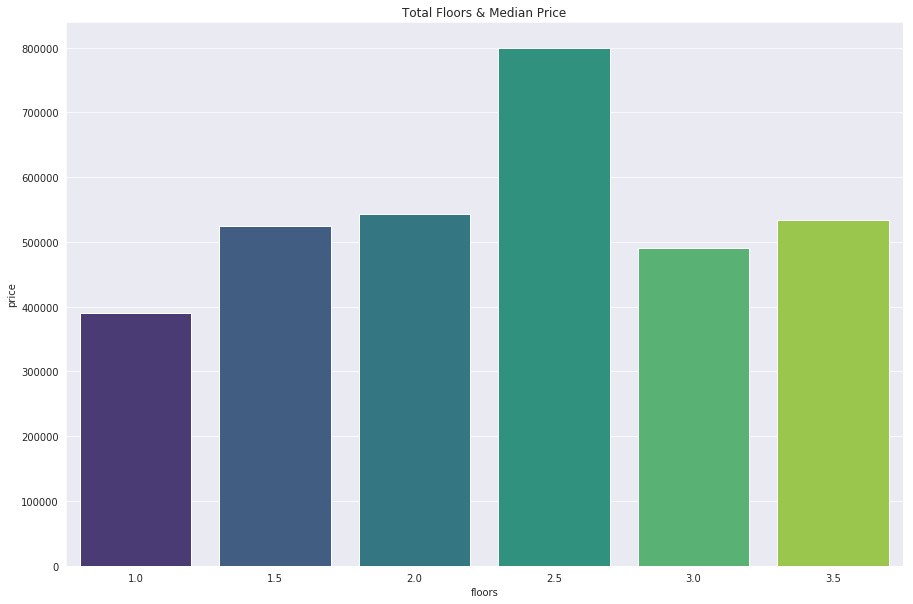

In [16]:
# 物件の階数（floors）を基軸に中央値でグルーピング
kchouse_m_floors = kchouse.groupby('floors', as_index=True).median()

# 物件の階数と価格の中央値のグラフ
plt.figure(figsize=(15,10))
plt.title('Total Floors & Median Price')
sns.barplot(x=kchouse_m_floors.index,y='price', data=kchouse_m_floors, palette = 'viridis')

### 湖岸の景色の有無（waterfront）

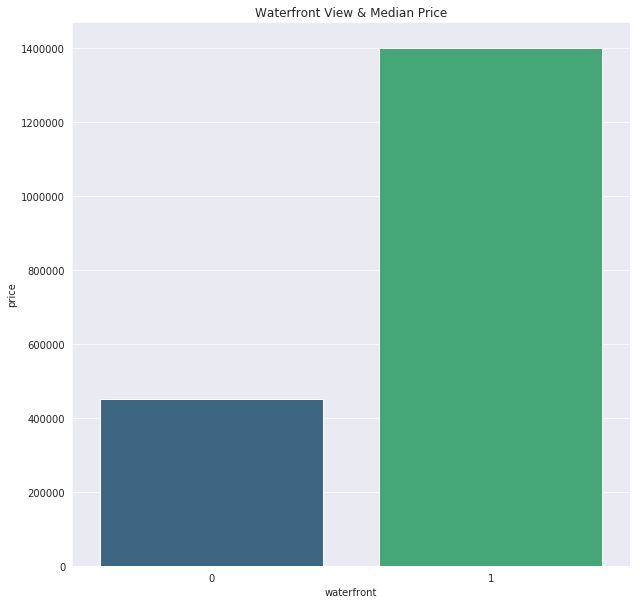

In [17]:
# 湖岸の景色の有無（waterfront）を基軸に中央値でグルーピング
kchouse_m_waterfront = kchouse.groupby('waterfront', as_index=True).median()

# 湖岸の景色の有無と価格の中央値のグラフ
plt.figure(figsize=(10,10))
plt.title('Waterfront View & Median Price')
sns.barplot(x=kchouse_m_waterfront.index,y='price', data=kchouse_m_waterfront, palette= 'viridis')

### 内見された数（views）

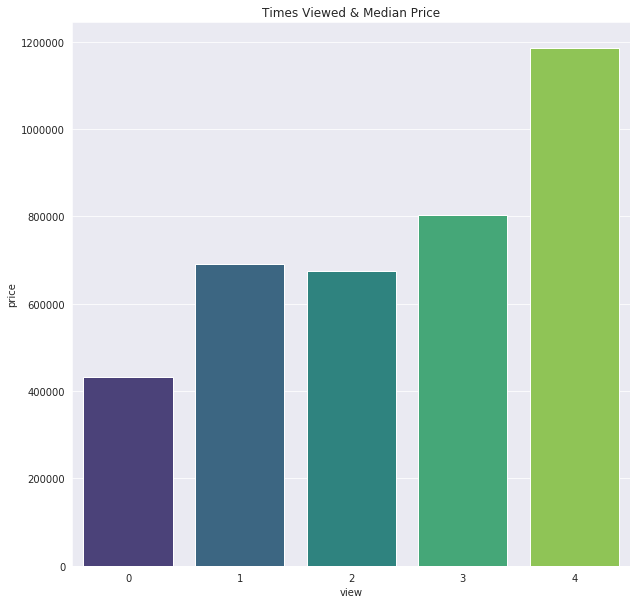

In [18]:
# 内見された数（views）を基軸に中央値でグルーピング
kchouse_m_view = kchouse.groupby('view', as_index=True).median()

# 内見された数と価格の中央値のグラフ
plt.figure(figsize=(10,10))
plt.title('Times Viewed & Median Price')
sns.barplot(x=kchouse_m_view.index,y='price', data=kchouse_m_view, palette= 'viridis')

### 物件のコンディション（condition）

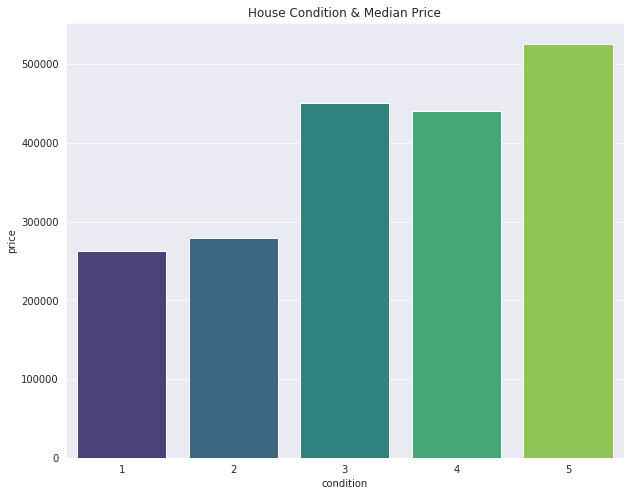

In [19]:
# 物件のコンディション（condition）を基軸に中央値でグルーピング
kchouse_m_condition = kchouse.groupby('condition', as_index=True).median()

# 物件のコンディションと価格の中央値のグラフ
plt.figure(figsize=(10,8))
plt.title('House Condition & Median Price')
sns.barplot(x=kchouse_m_condition.index,y='price', data=kchouse_m_condition, palette= 'viridis')

### 物件のグレード（grade）

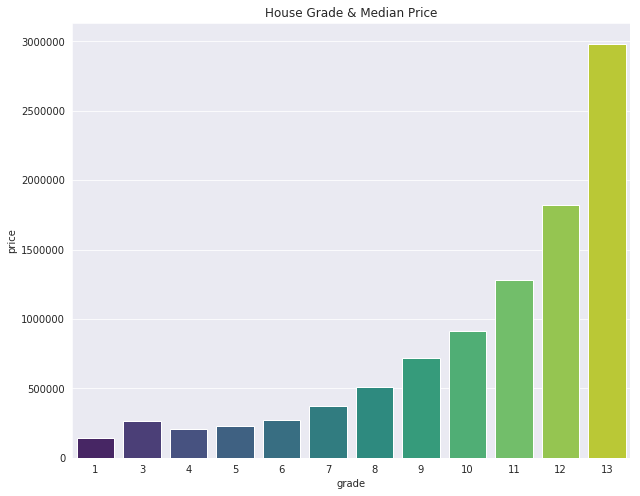

In [20]:
# 物件のグレード（grade）を基軸に中央値でグルーピング
kchouse_m_grade = kchouse.groupby('grade', as_index=True).median()

# 物件のグレードと価格の中央値のグラフ
plt.figure(figsize=(10,8))
plt.title('House Grade & Median Price')
sns.barplot(x=kchouse_m_grade.index,y='price', data=kchouse_m_grade, palette= 'viridis')

### 地上部の広さ（sqft_above）

Text(0.5, 1.0, 'SQFT Above Ground & Median Price')

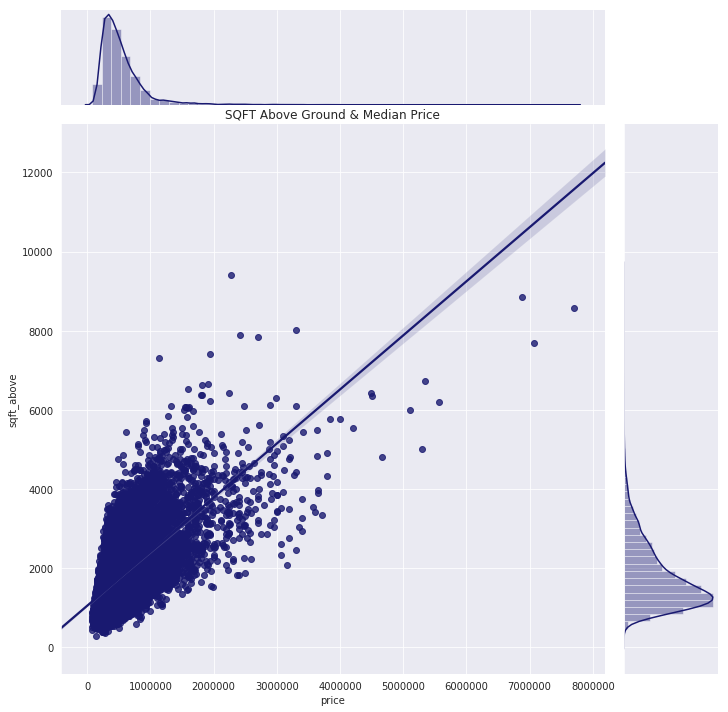

In [22]:
# 物件地上部の広さと価格の中央値のグラフ
sns.jointplot(x='price',y='sqft_above', data = kchouse, kind = 'reg', height = 10, color = 'midnightblue')
plt.title('SQFT Above Ground & Median Price') 

### 地下室の広さ（sqft_basement）

Text(0.5, 1.0, 'SQFT Basement & Median Price')

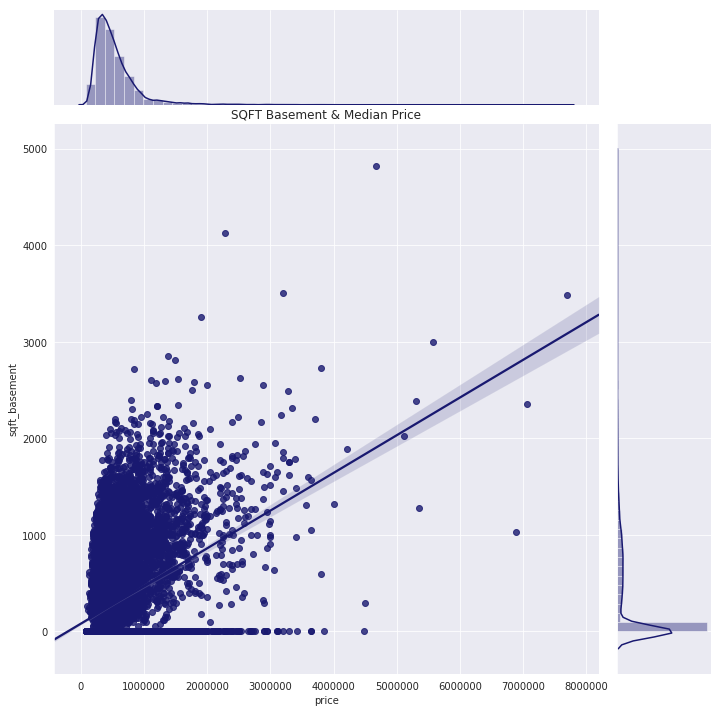

In [24]:
# 地下室の広さと価格の中央値のグラフ
sns.jointplot(x='price',y='sqft_basement', data = kchouse, kind = 'reg', height = 10, color = 'midnightblue')
plt.title('SQFT Basement & Median Price')

地下室がない（sqft_basement=0）物件の割合を見てみる

In [25]:
# 地下室がない物件の割合を計算
float(kchouse['sqft_basement'][kchouse['sqft_basement'] == 0].count()) / 21613 * 100

60.73196687179012

### 建造された年

Text(0.5, 1.0, 'Year Built & Median Price')

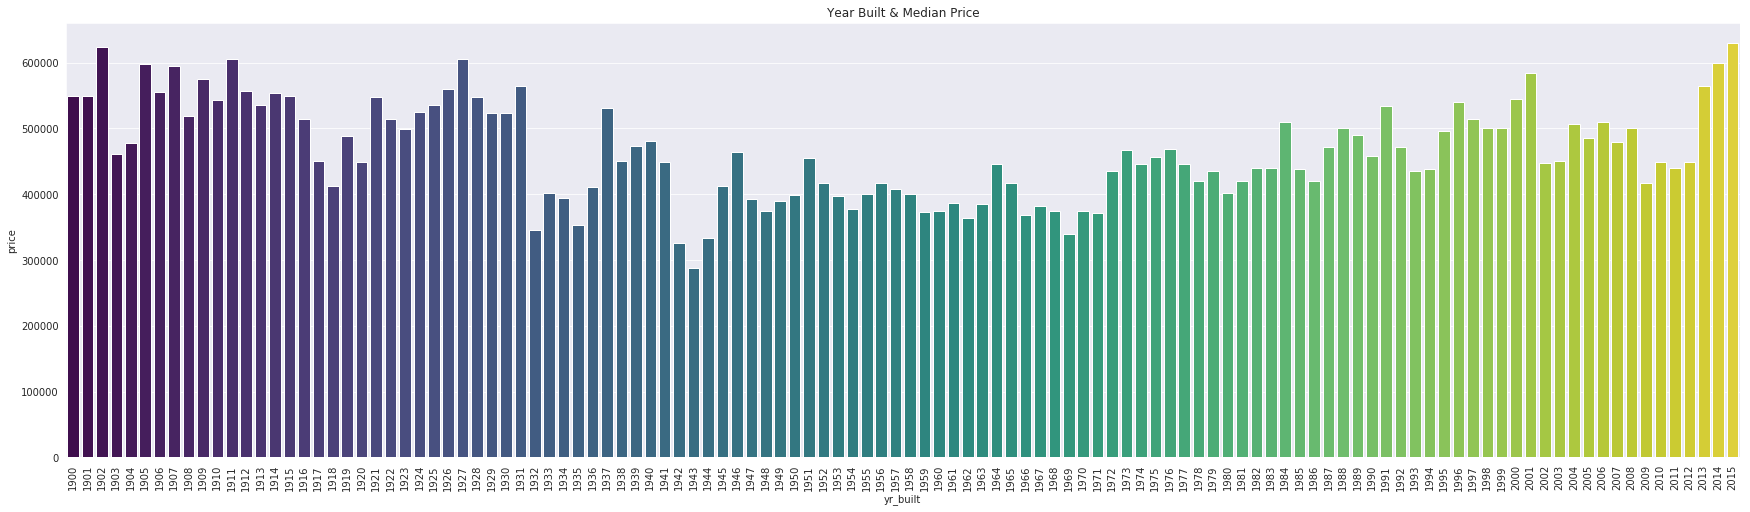

In [26]:
# 建造された年（yr_built）を基軸に中央値でグルーピング
kchouse_m_yr_built = kchouse.groupby('yr_built', as_index=True).median()

# 建造された年と価格の中央値のグラフ
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
sns.barplot(x=kchouse_m_yr_built.index,y='price', data=kchouse_m_yr_built, palette= 'viridis')
plt.title('Year Built & Median Price')

### リフォームされた年（yr_renovated）

Text(0.5, 1.0, 'Year Renovated & Median Price')

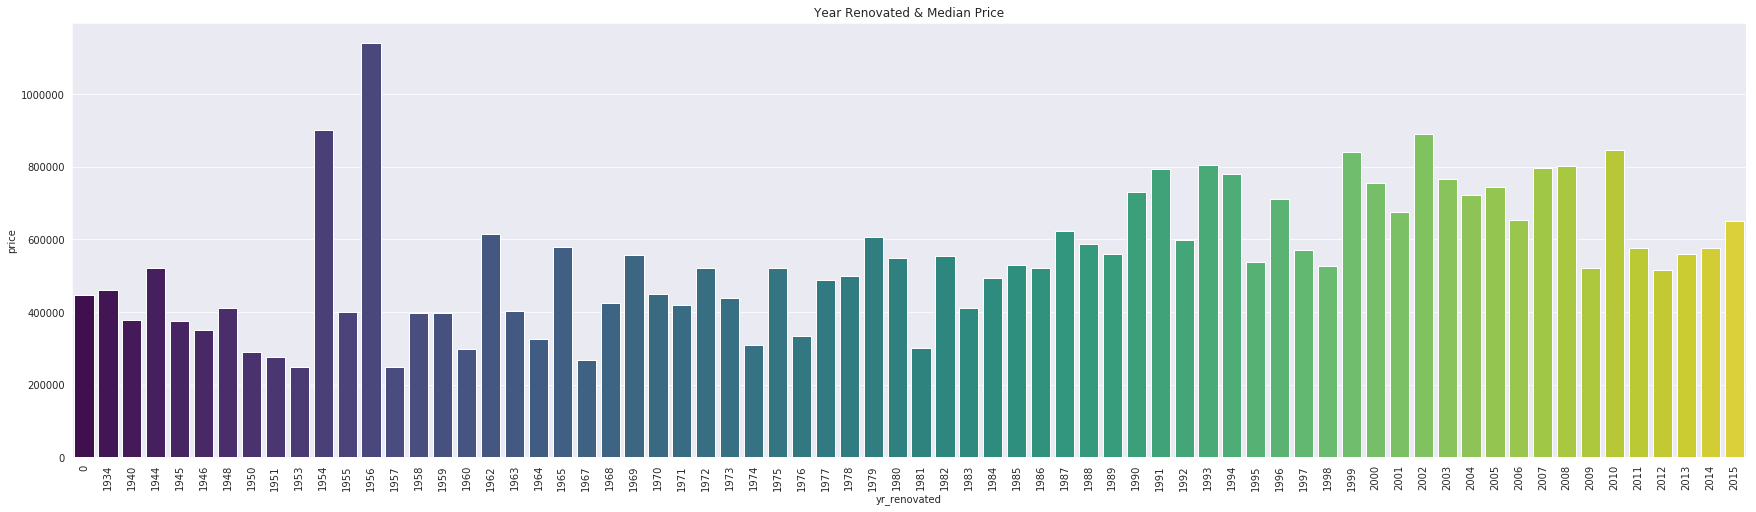

In [27]:
# 建造された年（yr_built）を基軸に中央値でグルーピング
kchouse_m_yr_ren = kchouse.groupby('yr_renovated', as_index=True).median().sort_values(by='price',ascending=False)

# 建造された年と価格の中央値のグラフ
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
sns.barplot(x=kchouse_m_yr_ren.index,y='price', data=kchouse_m_yr_ren, palette= 'viridis')
plt.title('Year Renovated & Median Price')

データ全体でのリフォーム実施の割合を見てみる。

In [28]:
# リフォームしていない物件の割合を計算
float(kchouse['yr_renovated'][kchouse['yr_renovated'] == 0].count()) / 21613 * 100

95.77106371165502

# Section.5: 特徴量エンジニアリング

## 1. リフォーム実施フラグ

Text(0.5, 1.0, 'Renovated vs Median Price')

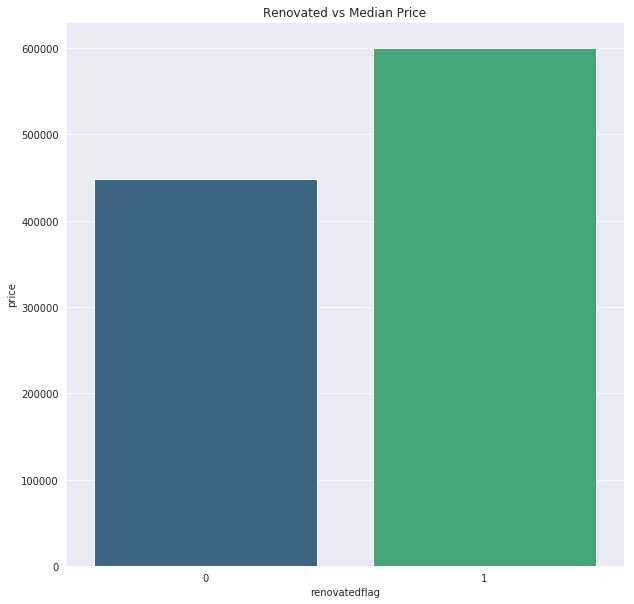

In [29]:
# （その１）リフォーム実施フラグの処理
kchouse['renovatedflag'] = np.where(kchouse['yr_renovated'] == 0 , 0, 1)

# リフォームフラグと価格中央値の可視化
ren_flag = kchouse.groupby('renovatedflag', as_index=True).median()
plt.figure(figsize=(10,10))
sns.barplot(x=ren_flag.index,y='price', data=ren_flag, palette= 'viridis')
plt.title('Renovated vs Median Price')

## 物件面積の変化量

Text(0.5, 1.0, 'Sqft Change since 2015 & Price')

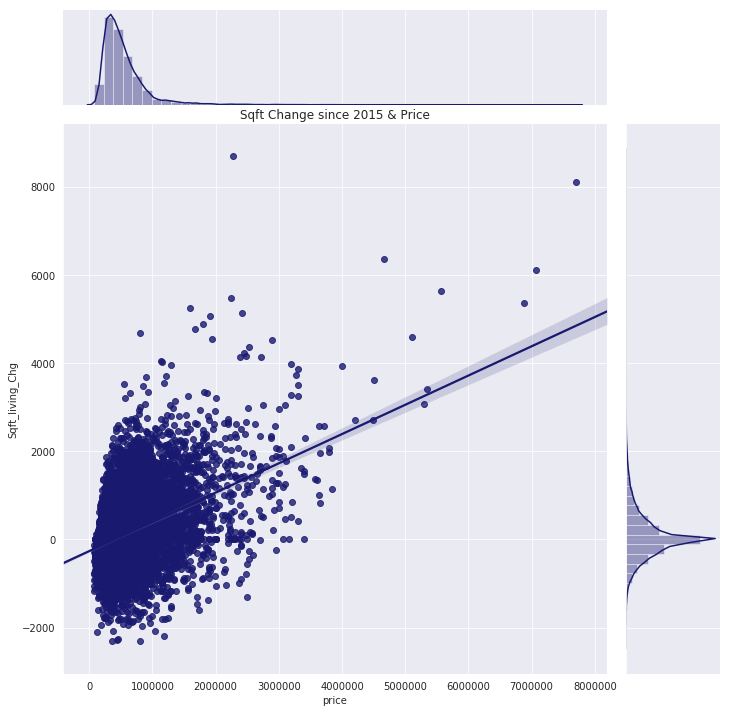

In [31]:
# （その2）物件面積の変化量の処理
kchouse['Sqft_living_Chg'] = kchouse['sqft_living'] - kchouse['sqft_living15']

# 物件面積の変化量と価格の可視化
sns.jointplot(x='price',y='Sqft_living_Chg', data = kchouse, kind = 'reg', height = 10, color = 'midnightblue')
plt.title('Sqft Change since 2015 & Price')

## 駐車場面積の変化量

Text(0.5, 1.0, 'SQft Lot Change vs Price')

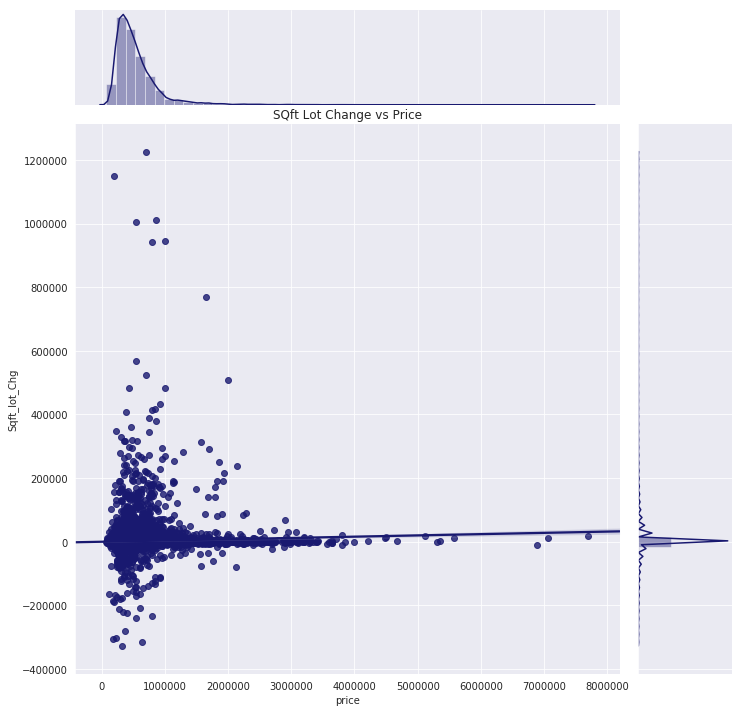

In [33]:
# （その3）駐車場面積の変化量
kchouse['Sqft_lot_Chg'] = kchouse['sqft_lot'] - kchouse['sqft_lot15']

# 駐車場面積の変化量と価格の可視化
sns.jointplot(x='price',y='Sqft_lot_Chg', data = kchouse, kind = 'reg', height = 10, color = 'midnightblue')
plt.title('SQft Lot Change vs Price')

In [34]:
# データセットの確認
kchouse.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovatedflag,Sqft_living_Chg,Sqft_lot_Chg
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,-160,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,880,-397
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,-1950,1938
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,600,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,-120,577


In [0]:
# 訓練（train）とテスト（test）データへスプリット
train_set, test_set = train_test_split(kchouse, test_size = 0.2, random_state = 42)

In [0]:
# 訓練データの切り分け
X_train = train_set.drop('price',axis=1)
y_train = train_set['price'].copy()

# テストデータの切り分け
X_test = test_set.drop('price',axis=1)
y_test = test_set['price'].copy()

# Section.6: 特徴選択

In [37]:
# ランダムフォレストレグレッサーの設定
RFclf = RandomForestRegressor(n_estimators=100, criterion='mse')

# モデル訓練
RFclf = RFclf.fit(X_train,y_train)

# 各特徴量を重要度順にソートして表示
features = X_train.columns
importances = RFclf.feature_importances_

print("Features sorted by most importance:")
print(sorted(zip(map(lambda x: round(x, 2), RFclf.feature_importances_), features), 
             reverse=True))

Features sorted by most importance:
[(0.32, 'grade'), (0.26, 'sqft_living'), (0.15, 'lat'), (0.06, 'long'), (0.04, 'yr_built'), (0.03, 'waterfront'), (0.03, 'sqft_living15'), (0.02, 'sqft_above'), (0.02, 'bathrooms'), (0.01, 'zipcode'), (0.01, 'view'), (0.01, 'sqft_lot15'), (0.01, 'sqft_lot'), (0.01, 'sqft_basement'), (0.01, 'Sqft_lot_Chg'), (0.01, 'Sqft_living_Chg'), (0.0, 'yr_renovated'), (0.0, 'renovatedflag'), (0.0, 'floors'), (0.0, 'condition'), (0.0, 'bedrooms')]


In [0]:
## 重要度が高いと出た特徴量のみ
X_train = X_train[['grade','sqft_living','lat','long','yr_built','waterfront']]
X_test = X_test[['grade','sqft_living','lat','long','yr_built','waterfront']]

# Section.7: 決定木で予測

深すぎる木は過学習しやすいという特徴がある。

In [0]:
# 3層の決定木モデル
clf = DecisionTreeRegressor(max_depth=3)

# 訓練データの特徴量とターゲットをフィッティング
clf = clf.fit(X_train,y_train)

# 訓練データの特徴量（X_train）を使って予測
y_pred = clf.predict(X_train)

In [40]:
np.sqrt(mean_squared_error(y_train, y_pred))

225308.37182878164

In [41]:
# 訓練した決定木モデルへテストデータを使って予測
y_pred_test = clf.predict(X_test)

# テストデータでのRMSE
np.sqrt(mean_squared_error(y_test, y_pred_test))

257117.9540962996

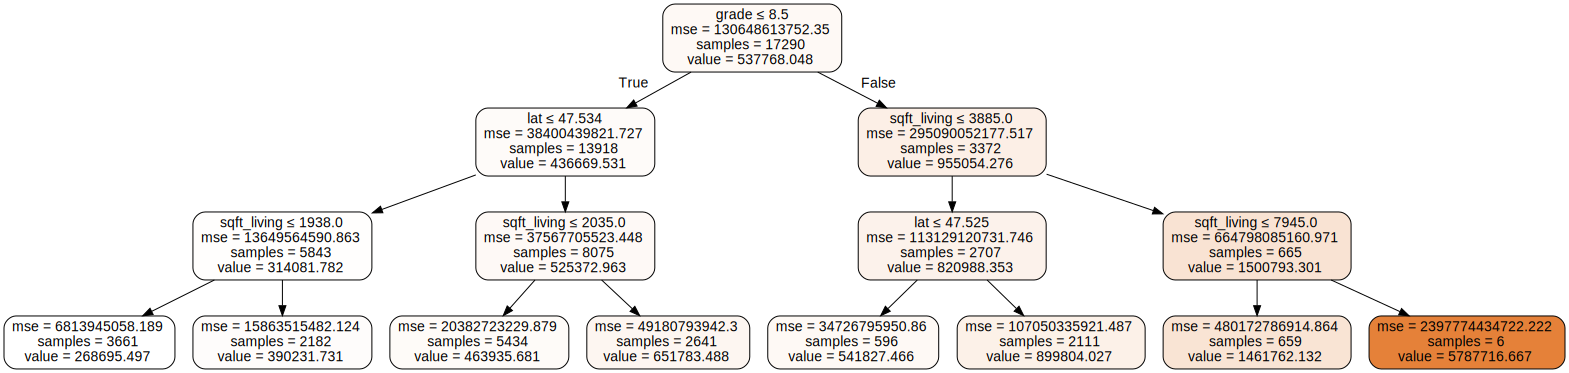

In [42]:
# 決定木の視覚化
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=X_train.columns,
                         class_names=X_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

# Section.8: ランダムフォレストで予測

In [0]:
# 決定木100本のランダムフォレスト
RFclf = RandomForestRegressor(n_estimators=100)

# 訓練データのフィッティング
RFclf = RFclf.fit(X_train, y_train)

# 訓練データの予測
RF_y_pred = RFclf.predict(X_train)

In [44]:
# ランダムフォレスト 訓練データ RMSE
np.sqrt(mean_squared_error(y_train, RF_y_pred))

49447.538948846865

In [45]:
# テストデータを使って予測
RF_y_pred_test = RFclf.predict(X_test)

# RMSEを計算
np.sqrt(mean_squared_error(y_test,RF_y_pred_test))

141268.46804392288

In [46]:
# 実際値と予測値のデータフレーム
DFRFtest = pd.DataFrame({'Actual':y_test, 'Prediction': RF_y_pred_test})

# 最初の5行を確認
DFRFtest.head()

,Actual,Prediction
735,365000.0,362976.08
2830,865000.0,824198.50
4106,1038000.0,1136423.80
16218,1490000.0,2152764.50
19964,711000.0,721292.90
